In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
import os

if not os.getcwd().endswith('lab1'):
    os.chdir('./lab1')

### Data loading

In [21]:
df = pd.read_csv('./data/04cars-data.csv')

df

,Vehicle Name,Small/Sporty/ Compact/Large Sedan,Sports Car,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,0,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,1,0,0,0,0,0,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,1,0,0,0,0,0,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,0,0,0,1,0,0,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,0,0,0,1,0,0,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


Leave 11 last columns (features)

In [66]:
df = df.drop(df.columns[1:-11], axis=1)
df

,Vehicle Name,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [67]:
X_cars = df.iloc[:, 1:].values
Y_cars = df.iloc[:, 0].values

### Data normalization

In [68]:
X_cars = StandardScaler().fit_transform(X_cars)

### PCA transformation

In [69]:
pca = PCA()
X_pca = pca.fit_transform(X_cars)

pca.explained_variance_ratio_

array([6.45876221e-01, 1.71265888e-01, 7.72480259e-02, 3.24559536e-02,
       2.50395994e-02, 1.79948832e-02, 1.27744735e-02, 7.87625563e-03,
       6.03527097e-03, 3.36157838e-03, 7.18504308e-05])

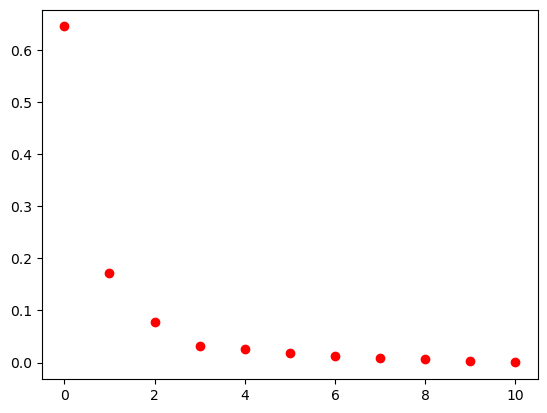

In [70]:
plt.plot(pca.explained_variance_ratio_, 'ro')
plt.show()

### 2 main components values with feature names

In [71]:
attributes = df.columns[1:]

pc1 = pca.components_[0]
pc2 = pca.components_[1]

print('Attribute, PC1, PC2')
for i in range(0, pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.26375044344403414:0.46850869750253915
Dealer Cost:-0.26231863875309513:0.47014658513822566
Engine Size (l):-0.34708049202520075:-0.015347186463713414
Cyl:-0.3341887576286374:0.07803201087501901
HP:-0.31860225848402934:0.2922134761391819
City MPG:0.3104817267323128:-0.003365935761659458
Hwy MPG:0.3065886385804443:-0.010964460145348909
Weight:-0.3363293669404879:-0.16746357154787
Wheel Base:-0.2662100335710543:-0.4181771069592043
Len:-0.25679018767068235:-0.40841138066875476
Width:-0.29605459141706114:-0.3128913501625069


### Feature vectors visualization for 2 main components

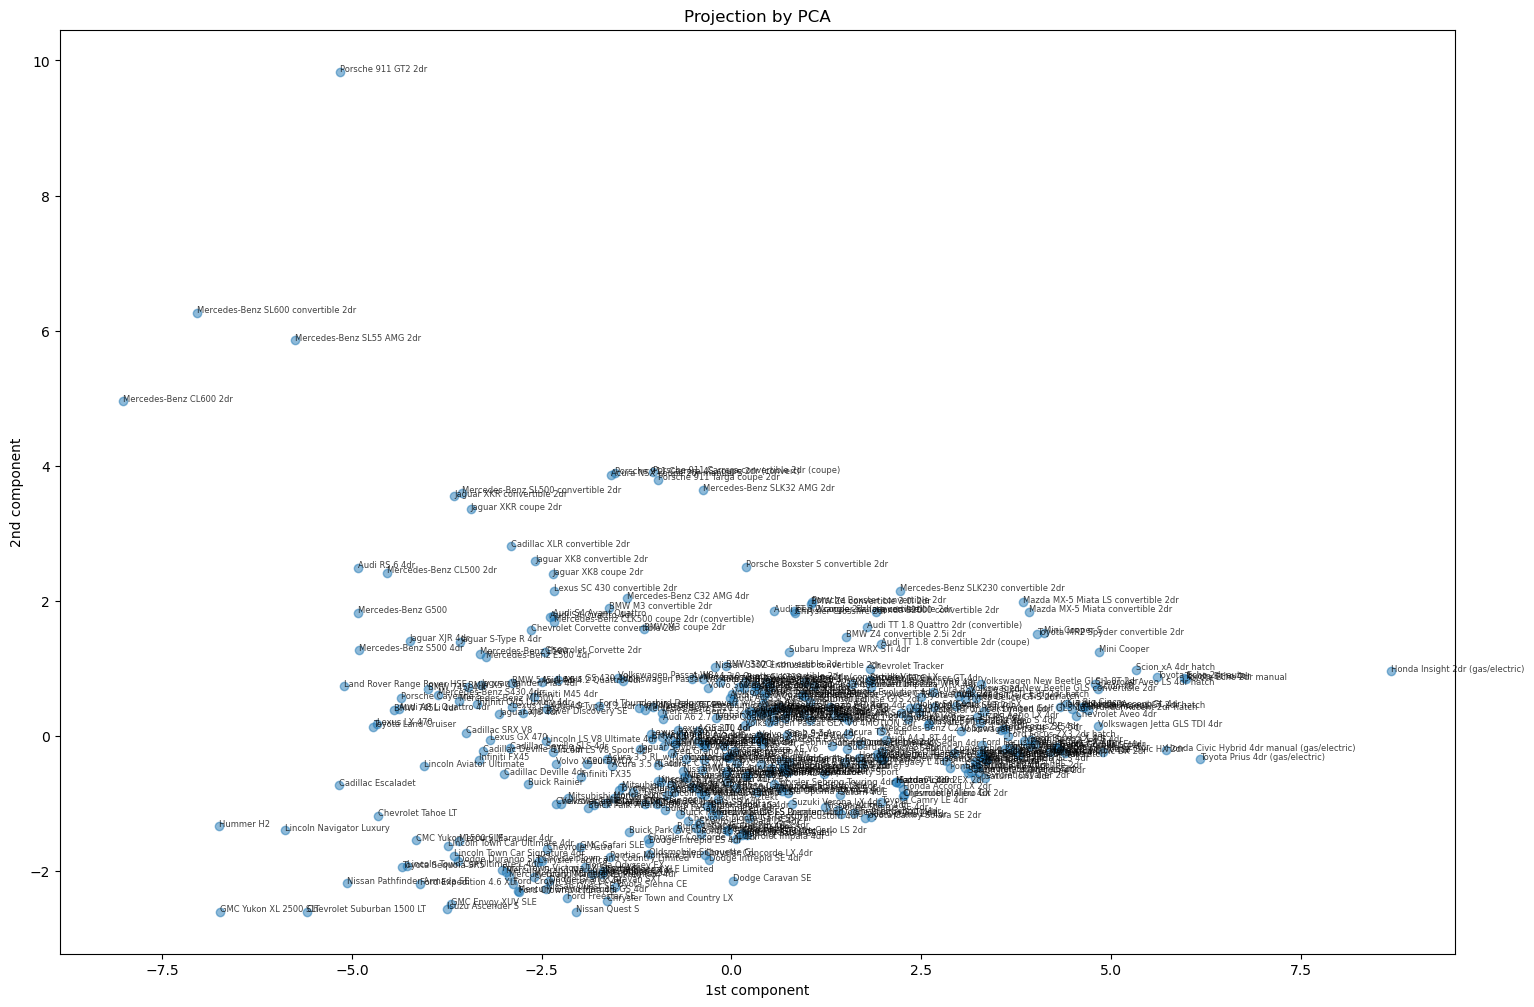

In [84]:
plt.figure(figsize=(18, 12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

for i, txt in enumerate(Y_cars):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=6, alpha=0.75)

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Visualization of features projected to 2 main components

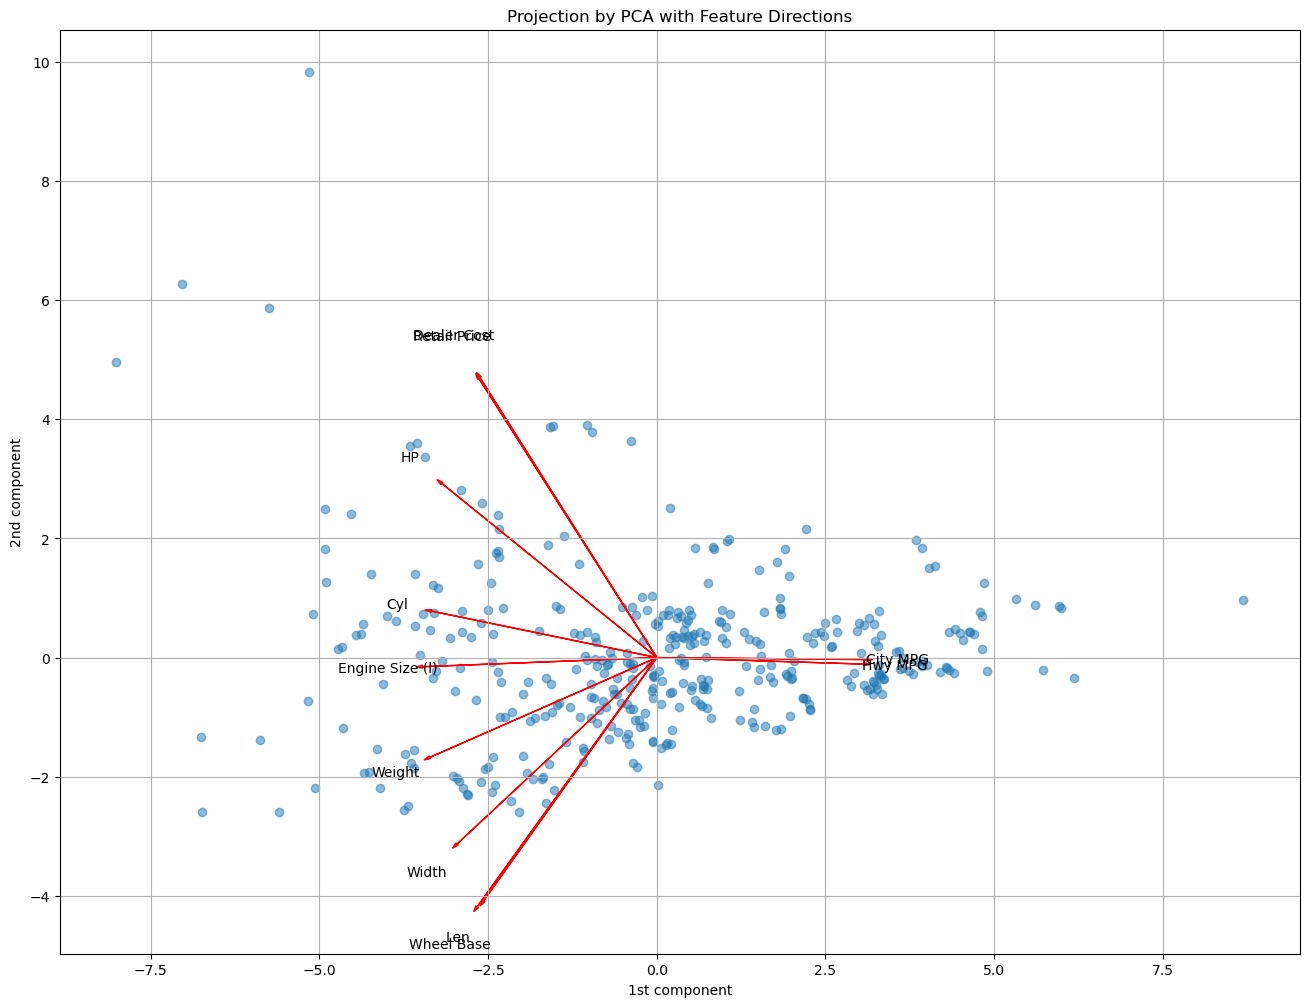

In [90]:
plt.figure(figsize=(16, 12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

for i, (component, attribute) in enumerate(zip(pca.components_.T, attributes)):
    vector = component * 10  # scaling factor to make the arrows visible
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.1, ec='r')
    
    offset = 0.15 # text offset near arrows
    plt.text(vector[0] * (1 + offset), vector[1] * (1 + offset), attribute, ha='center', va='center')

plt.title("Projection by PCA with Feature Directions")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.grid(True)
plt.show()